In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/all_salary_stats.csv')
df.shape

(705, 111)

In [4]:
df[[ 'player_name','def_interceptions',
    'from_mish_tackles_won','Tackles_Won',
  'Recoveries','Aerial_Duels_lost']].head()

,player_name,def_interceptions,from_mish_tackles_won,Tackles_Won,Recoveries,Aerial_Duels_lost
0,Carles Gil,23,4,4,164,4
1,Julian Gressel,68,19,19,251,30
2,Emanuel Reynoso,27,43,43,198,18
3,Albert Rusnák,25,16,16,203,4
4,Maximiliano Moralez,23,26,26,167,10


In [23]:
def per_90(cols,df):
    # create list of games played values and map anything less than 1 to one 
    nines=[i if i >1 else 1 for i in df['Nineties'] ]
    # use new list to do calc so not dividing by value less than 1 
    for col in cols:
        df[col] = df[col]/nines
    return df

In [27]:
## create list of columns to be adjusted to per 90 stats
cols =  df.columns[9:]


df =  per_90(cols,df)
df[['player_name','Opposing_Touches','player_name','def_interceptions',
    'from_mish_tackles_won','Tackles_Won',
  'Recoveries','Aerial_Duels_lost']].head(3)

,player_name,Opposing_Touches,player_name,def_interceptions,from_mish_tackles_won,Tackles_Won,Recoveries,Aerial_Duels_lost
0,Carles Gil,20024,Carles Gil,0.905512,0.157480,0.157480,6.456693,0.157480
1,Julian Gressel,20526,Julian Gressel,2.274247,0.635452,0.635452,8.394649,1.003344
2,Emanuel Reynoso,20887,Emanuel Reynoso,1.018868,1.622642,1.622642,7.471698,0.679245


In [ ]:
## get amount of touches per game to use in pAdj calc 

# df['Opposing_Touches'] = df['Opposing_Touches']/34


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  705 non-null    int64  
 1   fb_id                       705 non-null    object 
 2   player_name                 705 non-null    object 
 3   Squad_from_op               705 non-null    object 
 4   Opposing_Poss               705 non-null    float64
 5   Opposing_Touches            705 non-null    int64  
 6   Player                      705 non-null    object 
 7   Nation                      705 non-null    object 
 8   Position                    705 non-null    object 
 9   Nineties                    705 non-null    float64
 10  xA                          705 non-null    float64
 11  Key_pass                    705 non-null    float64
 12  Comp_prog                   705 non-null    float64
 13  Total_Cmp                   705 non

In [14]:
df.columns

Index(['Unnamed: 0', 'fb_id', 'player_name', 'Squad_from_op', 'Opposing_Poss',
       'Opposing_Touches', 'Player', 'Nation', 'Position', 'Total_tackles',
       'Tackles_Won', 'Tackles_Def_3rd', 'Tackles_Mid_3rd', 'Tackles_Att_3rd',
       'Num_Dribblers_tackled', 'Num_Dribbled_past', 'total_pressing',
       'Won_ball_5_sec', 'pct_won', 'pres_Def_3rd', 'pres_Mid_3rd',
       'pres_Att_3rd', 'Blocks', 'Blocked_shots', 'Blocked_SOT',
       'Blocked_pass', 'Interceptions', 'Tackles_and_Ints', 'Clearences',
       'Nineties', 'xA', 'Key_pass', 'Comp_prog', 'Total_Cmp', 'Total_Att',
       'Total_Cmp_pct', 'Total_Tot_Dist', 'Total_Prg_Dist', 'Short_Cmp',
       'Short_Att', 'Short_Cmp_pct', 'Medium_Cmp', 'Medium_Att',
       'Medium_Cmp_pct', 'Long_Cmp', 'Long_Att', 'Long_Cmp_pct', 'touches',
       'touches_def_box', 'touches_def_3rd', 'touches_mid_3rd',
       'touches_att_3rd', 'touches_att_box', 'touch_live', 'dribble_Succ',
       'dribble_Att', 'dribble_Succ_pct', 'num_dribble_past

In [28]:
def pAdj(df,cols):
  """ create possesion adjusted defensive stats and remove orignial"""
  for col in cols:
    label = 'pAdj_'+col
  
    df[label] = (df[col]/(df['Opposing_Touches']/34)) * 1000
    df.drop(columns=[col],inplace=True)
  
  return df

In [29]:
cols = [ 'Total_tackles',
       'Tackles_Won', 'Tackles_Def_3rd', 'Tackles_Mid_3rd', 'Tackles_Att_3rd',
       'Num_Dribblers_tackled', 'Num_Dribbled_past', 'total_pressing',
       'Won_ball_5_sec', 'pct_won', 'pres_Def_3rd', 'pres_Mid_3rd',
       'pres_Att_3rd', 'Blocks', 'Blocked_shots', 'Blocked_SOT',
       'Blocked_pass', 'Interceptions', 'Tackles_and_Ints', 'Clearences',
        'Yellow_cards','Red_cards','Second_yellow','Fouls','def_interceptions',
        'from_mish_tackles_won','PK_conceded','OG','Recoveries','Aerial_Duels_lost']

In [30]:
df=pAdj(df,cols)
df[[ 'player_name','Opposing_Touches','pAdj_def_interceptions',
    'pAdj_from_mish_tackles_won','pAdj_Tackles_Won','pAdj_Recoveries',
    'pAdj_Aerial_Duels_lost']].head()



,player_name,Opposing_Touches,pAdj_def_interceptions,pAdj_from_mish_tackles_won,pAdj_Tackles_Won,pAdj_OG,pAdj_Recoveries,pAdj_Aerial_Duels_lost
0,Carles Gil,20024,1.537525,0.267396,0.267396,0.0,10.963222,0.267396
1,Julian Gressel,20526,3.767145,1.052585,1.052585,0.0,13.905196,1.661976
2,Emanuel Reynoso,20887,1.658520,2.641347,2.641347,0.0,12.162481,1.105680
3,Albert Rusnák,19279,1.304421,0.834829,0.834829,0.0,10.591897,0.208707
4,Maximiliano Moralez,19332,1.526455,1.725558,1.725558,0.0,11.083393,0.663676


In [35]:
df.xG.describe()

AttributeError: 'DataFrame' object has no attribute 'xG'

ValueError: Could not interpret value `xG` for parameter `x`

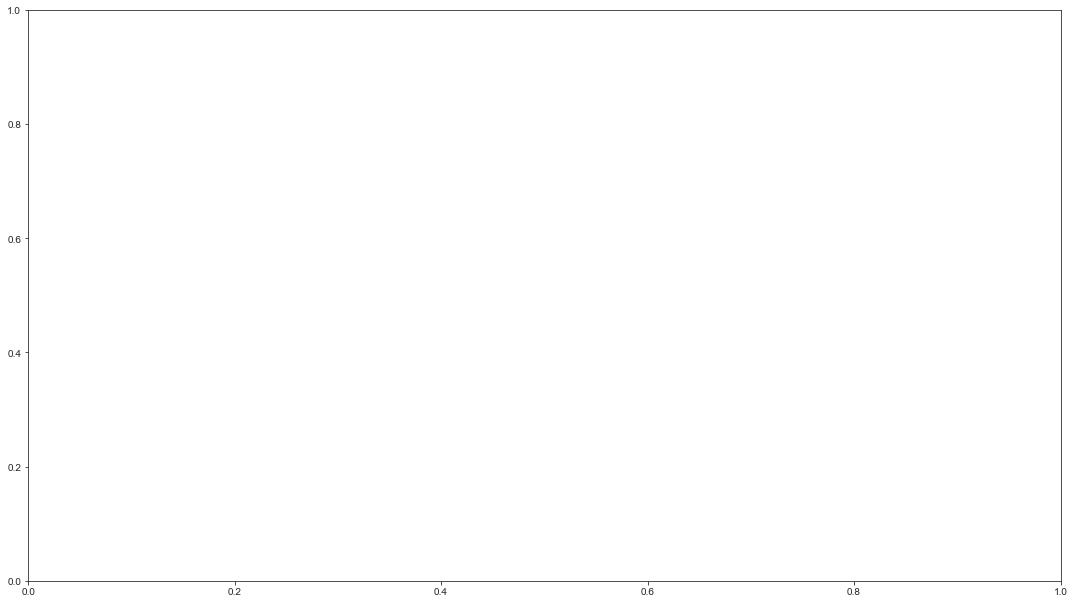

In [33]:
df['int_tackl_recover'] = df['pAdj_def_interceptions']+df['pAdj_from_mish_tackles_won']+df['pAdj_Recoveries']

graph = df.loc[(df['int_tackl_recover']<35)&(df['Position']!='GK')&(df['Aerial_win_pct']<100)&
               (df['Aerial_win_pct']>0)&(df['Nineties']>5)]

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
g = sns.scatterplot(data=graph, x ='xG', y='xA',hue='Position', ax=ax).set(title='MLS 2021 xA. Vs xG per 90')
